___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [3]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [4]:
import pandas_datareader.data as web
start_date = datetime.datetime(2006, 1, 1)
end_date = datetime.datetime(2016, 1, 1)



In [5]:
#stock datafraemes
bacdf = data.DataReader('BAC', 'stooq', start_date, end_date)
cdf = data.DataReader('C', 'stooq', start_date, end_date)
gsdf = data.DataReader('GS', 'stooq', start_date, end_date)
jpmdf = data.DataReader('JPM', 'stooq', start_date, end_date)
msdf = data.DataReader('MS', 'stooq', start_date, end_date)
wfcdf = data.DataReader('WFC', 'stooq', start_date, end_date)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [6]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
tickers.sort()
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [7]:
bank_stocks = pd.concat([bacdf, cdf, gsdf, jpmdf, msdf, wfcdf], keys=tickers, axis=1)
bank_stocks.head()

BAC                                                 C  \
               Open     High      Low    Close        Volume     Open   
Date                                                                    
2006-01-03  39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04  39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05  39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06  39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09  39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

                                                     ...       MS           \
               High      Low    Close        Volume  ...     Open     High   
Date                                                 ...                     
2006-01-03  408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04  406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05  403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06  404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09  403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

                                                WFC                    \
                Low    Close        Volume     Open     High      Low   
Date                                                                    
2006-01-03  37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04  38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05  38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06  38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09  38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

                                   
              Close        Volume  
Date                               
2006-01-03  22.9581  1.530724e+07  
2006-01-04  22.6917  1.510382e+07  
2006-01-05  22.6690  1.407726e+07  
2006-01-06  22.7983  1.167705e+07  
2006-01-09  22.7983  7.808415e+06  

[5 rows x 30 columns]

** Set the column name levels (this is filled out for you):**

In [8]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [9]:
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04   39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05   39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06   39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09   39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04   406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05   403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06   404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09   403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04   38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05   38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06   38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09   38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   22.9581  1.530724e+07  
2006-01-04   22.6917  1.510382e+07  
2006-01-05   22.6690  1.407726e+07  
2006-01-06   22.7983  1.167705e+07  
2006-01-09   22.7983  7.808415e+06  

[5 rows x 30 columns]

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [100]:
bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').max()

Bank Ticker
BAC     46.2013
C      466.8120
GS     203.6910
JPM     57.1634
MS      58.5624
WFC     47.0925
dtype: float64

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [186]:
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' Returns'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000


** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

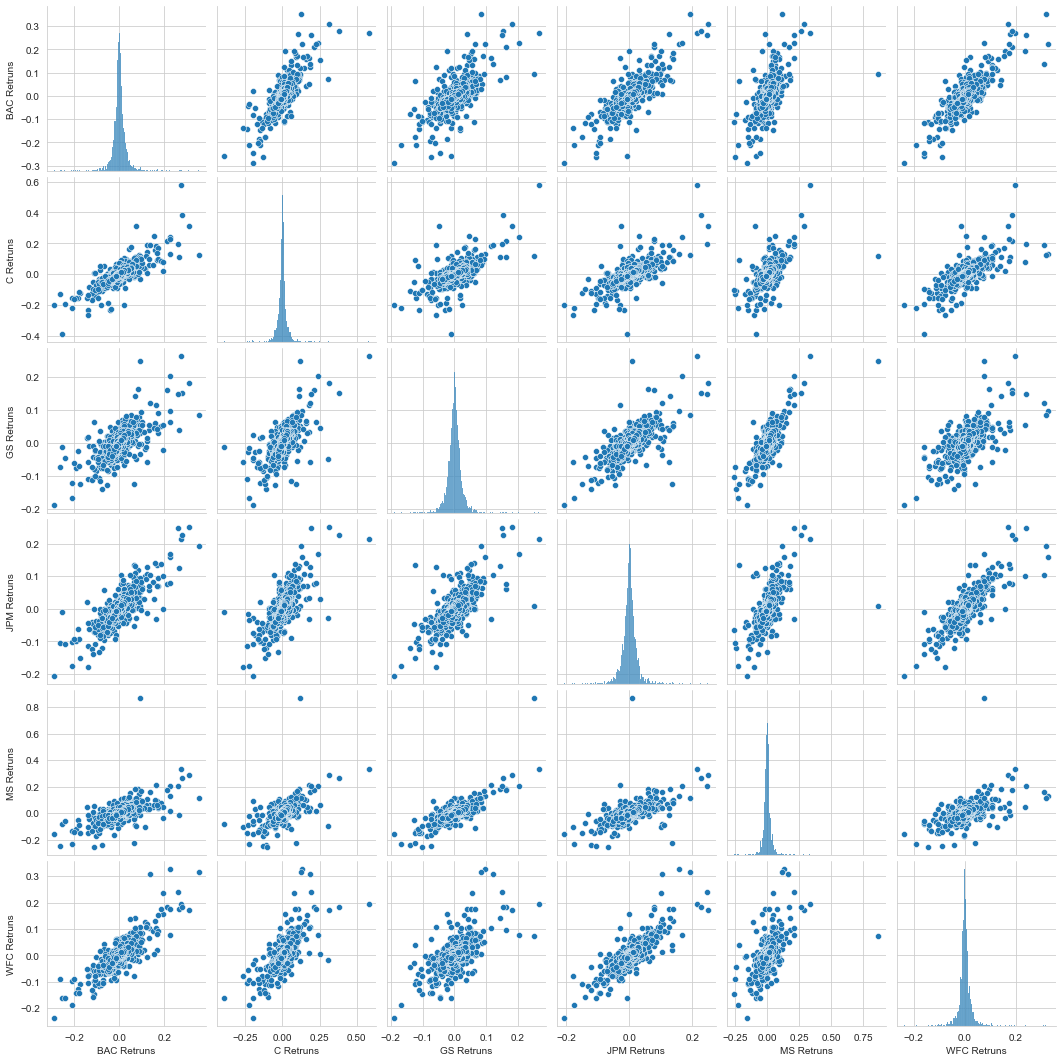

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.pairplot(returns)

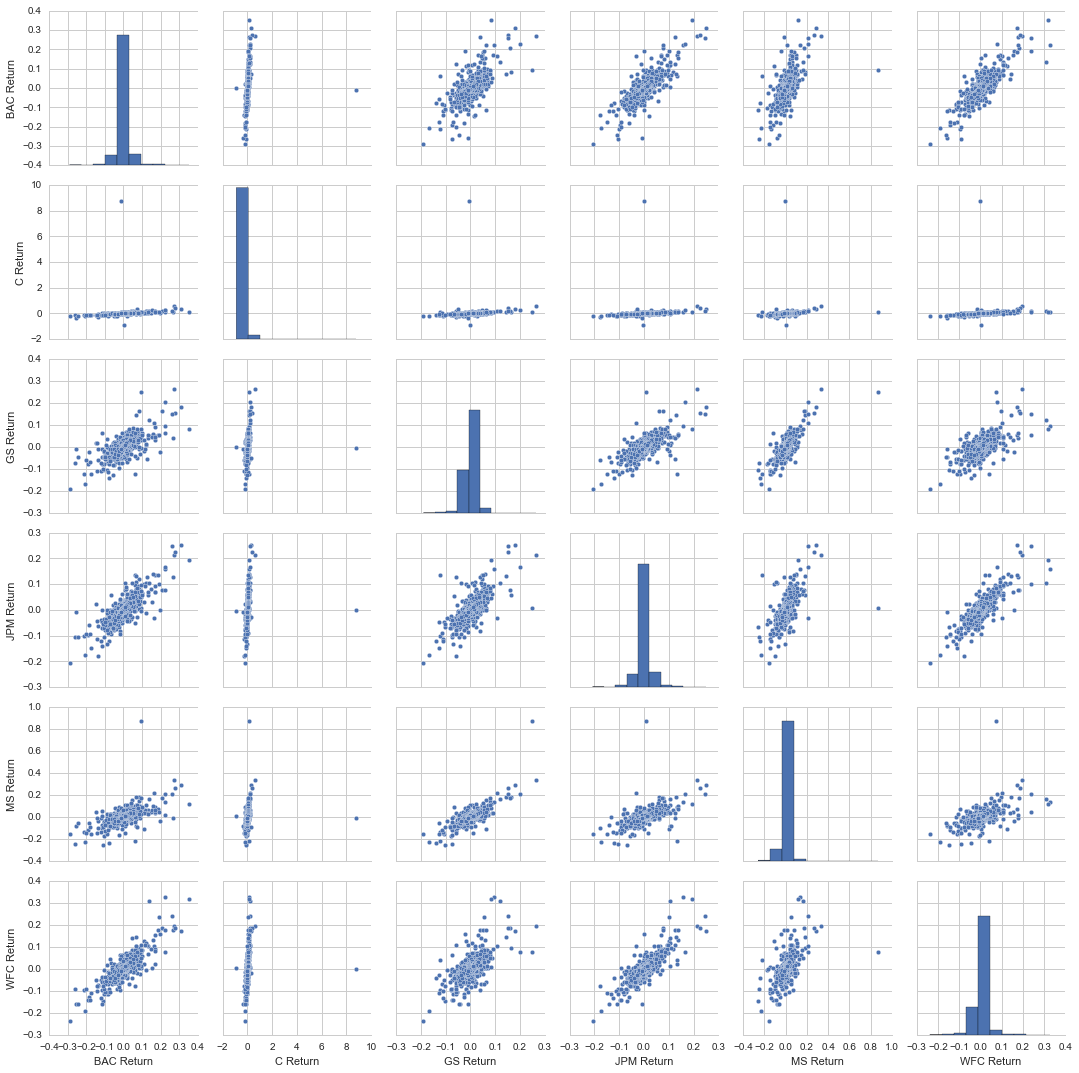

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [132]:
returns.idxmin()

BAC Retruns   2009-01-20
C Retruns     2009-02-27
GS Retruns    2009-01-20
JPM Retruns   2009-01-20
MS Retruns    2008-10-09
WFC Retruns   2009-01-20
dtype: datetime64[ns]

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [133]:
returns.idxmax()

BAC Retruns   2009-04-09
C Retruns     2008-11-24
GS Retruns    2008-11-24
JPM Retruns   2009-01-21
MS Retruns    2008-10-13
WFC Retruns   2008-07-16
dtype: datetime64[ns]

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [134]:
returns.std()

BAC Retruns    0.036605
C Retruns      0.038615
GS Retruns     0.025371
JPM Retruns    0.027670
MS Retruns     0.037708
WFC Retruns    0.030221
dtype: float64

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [146]:
#returns[returns['Date'].dt.year == 2015].std()
returns.loc['2015'].std()

BAC Retruns    0.016149
C Retruns      0.015280
GS Retruns     0.014028
JPM Retruns    0.013964
MS Retruns     0.016006
WFC Retruns    0.012545
dtype: float64

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

In [187]:
returns.head(5)

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000


In [189]:
s=returns.loc['2015']['MS Returns']
s

Date
2015-01-02   -0.002311
2015-01-05   -0.031302
2015-01-06   -0.028780
2015-01-07    0.014341
2015-01-08    0.014847
                ...   
2015-12-24   -0.003609
2015-12-28   -0.009601
2015-12-29    0.011815
2015-12-30   -0.009798
2015-12-31   -0.012995
Name: MS Returns, Length: 252, dtype: float64

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

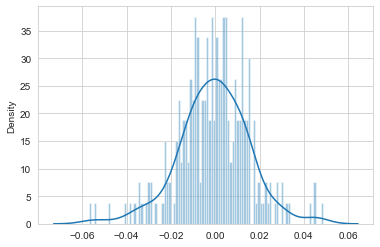

In [192]:
sns.displot(x=s, bins=100)

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



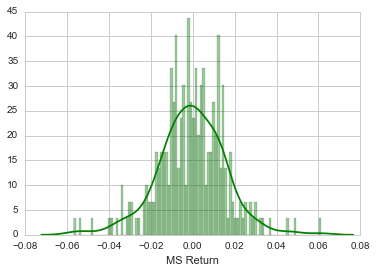

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

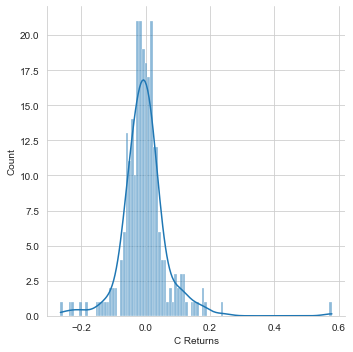

In [199]:
sns.displot(x=returns.loc['2008']['C Returns'], kind = 'hist', kde = True, bins = 100)

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



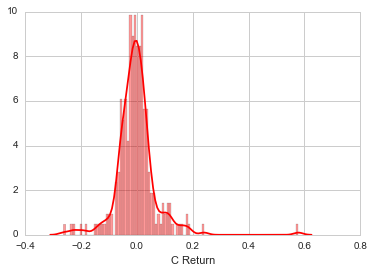

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [205]:
bank_stocks.head(5)

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04   39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05   39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06   39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09   39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04   406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05   403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06   404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09   403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04   38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05   38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06   38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09   38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   22.9581  1.530724e+07  
2006-01-04   22.6917  1.510382e+07  
2006-01-05   22.6690  1.407726e+07  
2006-01-06   22.7983  1.167705e+07  
2006-01-09   22.7983  7.808415e+06  

[5 rows x 30 columns]

In [16]:
df = bank_stocks.xs(('Close'), axis = 1, level=1)
df.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,39.6217,407.891,105.883,28.9771,38.2361,22.9581
2006-01-04,39.2004,400.354,104.432,28.5626,38.2675,22.6917
2006-01-05,39.2525,402.321,104.394,28.6520,38.3715,22.6690
2006-01-06,39.1917,402.321,105.855,28.8543,38.4108,22.7983
2006-01-09,39.2181,400.432,107.128,29.3229,38.8120,22.7983


<AxesSubplot:xlabel='Date'>

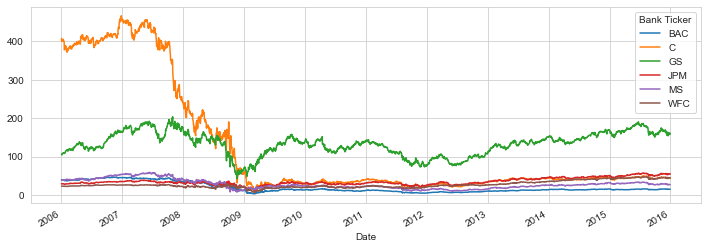

In [17]:
df.plot.line(figsize = (12,4))

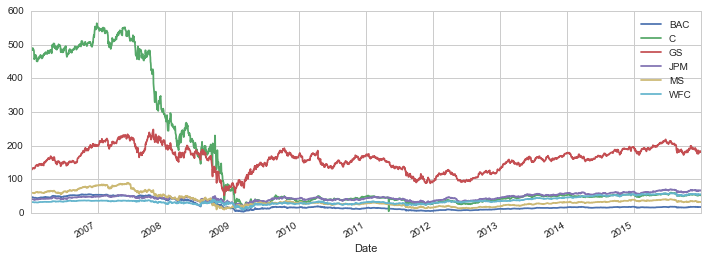

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [18]:
bank_stocks.xs(('BAC', 'Close'), axis = 1, level=(0,1))

Bank Ticker,BAC
Stock Info,Close
Date,
2006-01-03,39.6217
2006-01-04,39.2004
2006-01-05,39.2525
2006-01-06,39.1917
2006-01-09,39.2181
...,...
2015-12-24,15.0063
2015-12-28,14.8846


In [19]:
#bank_stocks.resample('M').mean().head(5)['BAC']['Close']
#fig , axes = plt.subplots(figsize = (12,4))
#sns.lineplot(data=bank_stocks.resample('M')['BAC']['Close'].mean(), color = 'red', ax = axes)
#sns.lineplot(data=bank_stocks.xs(('BAC', 'Close'), axis = 1, level=(0,1)), ax = axes)
bank_stocks.head()
BAC['Close'].loc['2008'].index
BAC['Close'].loc['2009'].index


NameError: name 'BAC' is not defined

In [13]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-02' : '2009-01-02'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-02' : '2009-01-02'].plot(label='BAC Close')
plt.legend()


NameError: name 'plt' is not defined

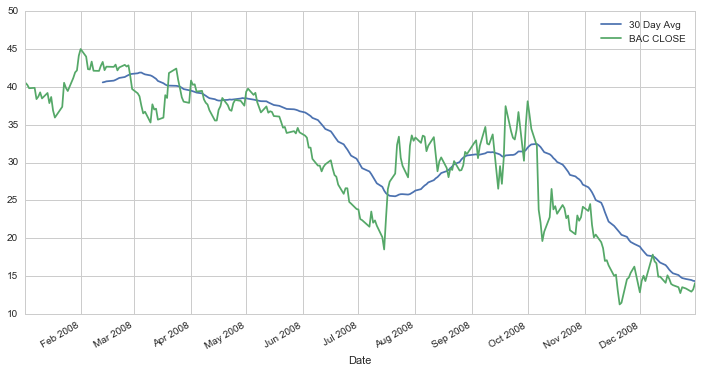

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

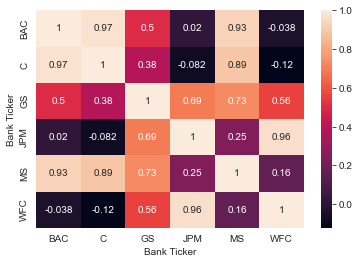

In [289]:
#hdf = bank_stocks.xs(('Close'), axis=1, level=1).groupby('Bank Ticker', level=0)

sns.heatmap(data = bank_stocks.xs(('Close'), axis=1, level='Stock Info').corr(), annot=True)

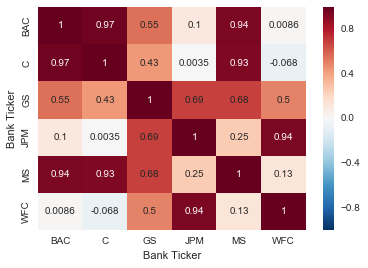

** Optional: Use seaborn's clustermap to cluster the correlations together:**

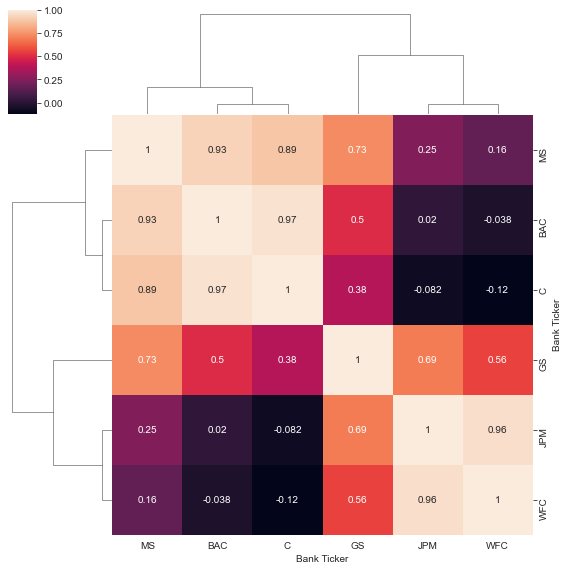

In [295]:

sns.clustermap(data = bank_stocks.xs(('Close'), axis=1, level='Stock Info').corr(), annot=True, figsize = (8,8))

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [67]:
import plotly
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
cf.go_offline()


In [77]:
bank_stocks.index

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=2517, freq=None)

In [48]:
bank_stocks['BAC']

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,39.4871,39.7023,38.8390,39.6217,1.936396e+07
2006-01-04,39.5549,39.7592,39.0904,39.2004,2.110031e+07
2006-01-05,39.2004,39.4126,38.9834,39.2525,1.761312e+07
2006-01-06,39.3850,39.4774,39.0089,39.1917,1.496529e+07
2006-01-09,39.3182,39.5294,39.0158,39.2181,1.855918e+07
...,...,...,...,...,...
2015-12-24,15.0495,15.1035,14.9630,15.0063,3.380344e+07
2015-12-28,14.9630,14.9720,14.7539,14.8846,4.803435e+07
2015-12-29,14.9897,15.0780,14.9130,15.0131,5.251059e+07


In [70]:
#bank_stocks.xs(('Close'), axis=1, level='Stock Info')
BACdf = bank_stocks['BAC'].loc['2015-01-02' : '2015-12-31']

In [96]:
fig = go.Figure(data=
    [go.Candlestick(x = bank_stocks.index,
                    open  = bank_stocks['BAC']['Open'],
                    high  = bank_stocks['BAC']['High'],
                    low   = bank_stocks['BAC']['Low'],
                    close = bank_stocks['BAC']['Close'])])

fig.update_layout(
    template ='plotly_dark',
    title='BAC Stock Price',
    yaxis_title="Price ($)",
    xaxis_rangeslider_visible=False
)

fig.show()
#BACdf.iplot(kind='candle', title='BAC Candle 2015')

In [91]:
qf = cf.QuantFig(BACdf, title='Banl of America', name='BAC',
                up_color='green',
                down_color='red')
qf.add_sma(periods=14, column='Close', color='blue')
qf.iplot()

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [92]:
MSdf = bank_stocks['MS'].loc['2015-01-02' : '2015-12-31']
qf = cf.QuantFig(MSdf, title='Morgan Stanley', name='MS',
                up_color='green',
                down_color='red')
qf.add_sma(periods=14, column='Close', color='blue')
qf.iplot()

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [95]:
qf = cf.QuantFig(BACdf, title='BanK of America', name='BAC',
                up_color='green',
                down_color='red')
qf.add_bollinger_bands(periods=14, column='Close', color='blue')
qf.iplot()

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.